#### Exploration of the *in vitro* Fub and Clint datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob

In [2]:
raw_dir = '/home/grace/Documents/python/httk/data/raw/'
processed_dir = '/home/grace/Documents/python/httk/data/processed/'
interim_dir = '/home/grace/Documents/python/httk/data/interim/'
figures_dir = '/home/grace/Documents/python/httk/reports/figures/'
external_dir = '/home/grace/Documents/python/httk/data/external/'

#### Reading in the data files

In [3]:
fub = pd.read_csv(raw_dir+'Fub_1139.csv')

In [4]:
clint = pd.read_csv(raw_dir+'Cl_642.csv')

Shape of the human in vitro Fub dataset - 1139 chemicals

In [5]:
fub.shape

(1139, 3)

Shape of the in vitro Clint data - 642 chemicals

In [6]:
clint.shape

(642, 3)

In [8]:
fub.head()

,CASRN,Name,Human.Funbound.plasma
0,94-74-6,Mcpa|2-methyl-4-chlorophenoxyacetic acid,0.018
1,148477-71-8,Spirodiclofen,0.005
2,56-29-1,Hexobarbital|Hexobarbitone,0.530
3,153233-91-1,Etoxazole,0.000
4,96182-53-5,Tebupirimfos,0.000


In [9]:
fub.set_index('CASRN', inplace = True)

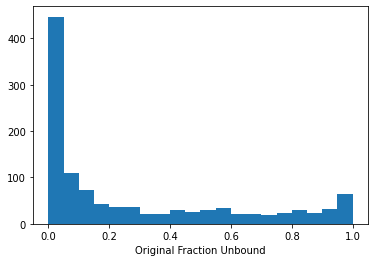

In [27]:
plt.hist(fub['Human.Funbound.plasma'], bins = 20)
plt.xlabel('Original Fraction Unbound');

In [11]:
clint.head()

,CASRN,Name,Human.Clint
0,94-74-6,Mcpa|2-methyl-4-chlorophenoxyacetic acid,0.0000
1,148477-71-8,Spirodiclofen,44.0152
2,56-29-1,Hexobarbital|Hexobarbitone,19.8000
3,153233-91-1,Etoxazole,18.4800
4,96182-53-5,Tebupirimfos,22.6400


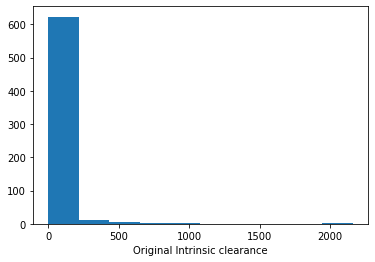

In [12]:
plt.hist(clint['Human.Clint'])
plt.xlabel('Original Intrinsic clearance');

#### Read AR-ER data to keep those chemicals as an external test set

In [13]:

AR_data = pd.read_excel(external_dir+'Supplemental File 2_ARpathway_Results_ConfScores_CI_2016-08-30.xlsx', index_col='CASRN')
AR_ACC_columns = [col for col in AR_data if col.endswith('ACC')]
AR_data_subset = AR_data[(AR_data['AUC.Agonist']>0.1) | (AR_data['AUC.Antagonist']>0.1)][AR_ACC_columns]

#ER data
ER_data = pd.read_excel(external_dir+'S2 ER SuperMatrix 2015-03-24.xlsx', index_col='CASRN')
ER_ACC_columns = [col for col in ER_data if col.endswith('ACC')]
ER_data_subset = ER_data[(ER_data['AUC.Agonist']>0.1) | (ER_data['AUC.Antagonist']>0.1)][ER_ACC_columns]

## Combine ER-AR data
ERARdata = pd.concat([AR_data_subset, ER_data_subset], axis = 1)
ERARdata.replace(1000000, np.nan, inplace = True)




In [22]:
ERARdata.shape

(268, 18)

In [16]:
## Separate training data and external test data
trainingData = fub.loc[fub.index.difference(ERARdata.index)]


In [34]:
trainingData.shape

(1025, 2)

In [35]:
trainingData.head()

,Name,Human.Funbound.plasma
1007-28-9,6-desisopropylatrazine|Deisopropylatrazine,0.459
100784-20-1,Halosulfuron-methyl|Halosulfuron methyl,0.009
100986-85-4,Levofloxacin,0.750
101-05-3,Anilazine,0.005
101-10-0,Cloprop,0.022


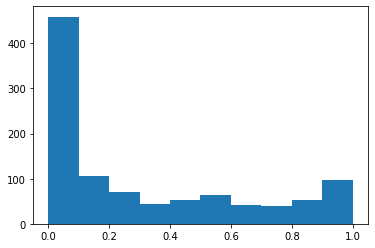

In [26]:
plt.hist(trainingData['Human.Funbound.plasma']);

In [36]:
y_var = 'Human.Funbound.plasma'

In [37]:
Y = trainingData[y_var]

In [40]:
Y = Y[Y!= 0]
Y[Y==1.0] = 0.99
Y[Y==0] = 0.005
Y.shape

(1025,)

In [41]:
## Extract y data
Y = trainingData[y_var]
## Transform Y
Y = Y[Y!= 0]
Y[Y==1.0] = 0.99
Y[Y==0] = 0.005

Y_model = (1-Y)/Y
Y_model = Y_model.apply(lambda x: np.log10(x))
Y_index = Y_model.index

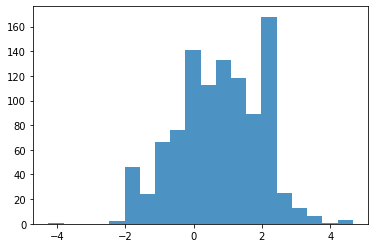

In [42]:
Y_model.hist(bins=20, alpha = 0.8, grid=False);